# SVM para classificação

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import common as com

from sklearn import datasets
from sklearn import svm

np.random.seed(12345)

train_ratio = 0.8
validation_ratio = 0.2

#x, y = datasets.load_iris(return_X_y=True)
#x = x[:,2:4]

#x, y = datasets.make_blobs(n_samples=60, centers=3, cluster_std=3, random_state=12345)
#x, y = datasets.make_moons(n_samples=300, noise=.1, random_state=12345)
x, y = datasets.make_circles(n_samples=300, noise=0.15, factor=0.5, random_state=12345)

#data_table = pd.read_csv('data/ex2data1.txt', header=None)
#data_table = pd.read_csv('data/ex2data2.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values

#data_table = pd.read_csv('data/blobs2.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values

labels = [0, 1, 2]
colors = ['green', 'blue', 'red']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
#plt.savefig('figs/blobs2.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

<Figure size 800x600 with 1 Axes>

## Divisão treino/teste e normalização dos dados

Número de padrões de treinamento: 241
Número de padrões de teste: 59


/home/cesarlincoln/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


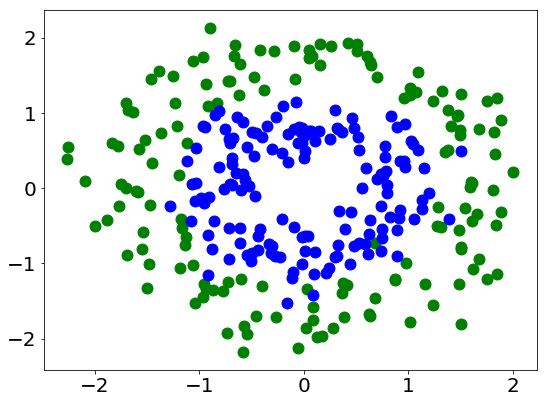

In [2]:
normalize_data = True

np.random.seed(12345)

number_train = int(np.ceil(train_ratio*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(train_index))
print("Número de padrões de teste: %d" % len(test_index))

if normalize_data:

    x_train_mean = np.mean(x_train, axis=0)
    x_train = x_train - x_train_mean
    x_train_std = np.std(x_train, axis=0)
    x_train /= x_train_std

    x_test = (x_test - x_train_mean) / x_train_std

    x = (x - x_train_mean) / x_train_std
    
    fig = plt.figure(figsize=com.figsize)
    plot_data(x, y)
    xlim = fig.gca().get_xlim() 
    ylim = fig.gca().get_ylim() 

## Solução via SVM

/home/cesarlincoln/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Melhores hiperparâmetros:
{'C': 32.0, 'gamma': 2.0, 'kernel': 'rbf'}
44 vetores suportes de 241 dados de treinamento (18.26% dos exemplos).
Taxa de erro no treinamento: 3.32%.
Taxa de erro no teste: 5.08%.


/home/cesarlincoln/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


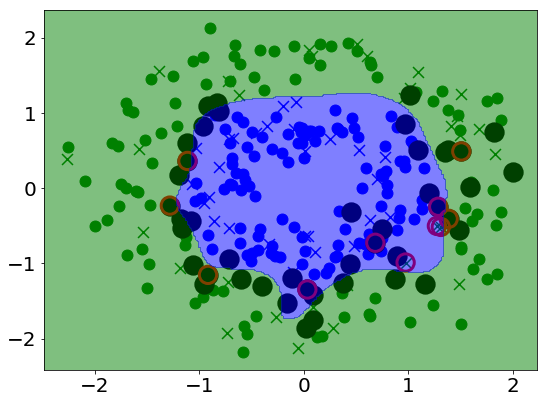

In [29]:
from sklearn.model_selection import GridSearchCV

model = svm.SVC(gamma='auto')

param_grid = [{'kernel': ['rbf'], 'C': 2 ** np.arange(-5.0, 16.0, 2),
                                  'gamma': 2 ** np.arange(-15.0, 4.0, 2)},
              {'kernel': ['poly'], 'C': 2 ** np.arange(-5.0, 16.0, 2),
                                   'degree': np.arange(2, 6)},
              {'kernel': ['linear'], 'C': 2 ** np.arange(-5.0, 16.0, 2)}]

model = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)

model.fit(x_train, y_train) 

support_vectors = model.best_estimator_.support_vectors_

print("Melhores hiperparâmetros:")
print(model.best_params_)
print("%d vetores suportes de %d dados de treinamento (%.2f%% dos exemplos)." \
      % (support_vectors.shape[0], x_train.shape[0], 100*support_vectors.shape[0]/x_train.shape[0]))

wrong_index_train = y_train != model.predict(x_train)
wrong_index_test = y_test != model.predict(x_test)    
    
plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
ax.scatter(support_vectors[:,0], support_vectors[:,1], s=300, facecolors='k', edgecolors='k', linewidth=3)
ax.scatter(x_train[wrong_index_train,0], x_train[wrong_index_train,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, model,
                  lambda x, model: model.predict(x),
                  xx, yy, colors)
#plt.savefig('circles_svm.png', dpi=com.dpi)

print("Taxa de erro no treinamento: %.2f%%." % (100*np.mean(wrong_index_train)))
print("Taxa de erro no teste: %.2f%%." % (100*np.mean(wrong_index_test)))